In [6]:
from diffusers import StableDiffusionPipeline, StableDiffusionImg2ImgPipeline, StableDiffusionUpscalePipeline, DiffusionPipeline, StableDiffusionDepth2ImgPipeline, DPMSolverMultistepScheduler
from diffusers import StableDiffusionImageVariationPipeline,StableDiffusionImageBlendingPipeline

import torch
from PIL import Image
import random
import cv2
import matplotlib.pyplot as plt

In [74]:
pipe = StableDiffusionImageBlendingPipeline.from_pretrained(
            "lambdalabs/sd-image-variations-diffusers", revision="v2.0"
        )
pipe = pipe.to("cuda")

image_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [67]:
pipe.components['unet']=lorapipe.components['unet']
pipe.unet=lorapipe.unet
#pipe.unet.load_attn_procs(model_path)

In [75]:
from PIL import Image
img1=Image.open('../data/emojis/barepng/u1f354.png')
img2=Image.open('../data/emojis/barepng/u1f628.png')

In [76]:
Ans=pipe(img1,img2)

  0%|          | 0/50 [00:00<?, ?it/s]

ValueError: Could not save to JPEG for display

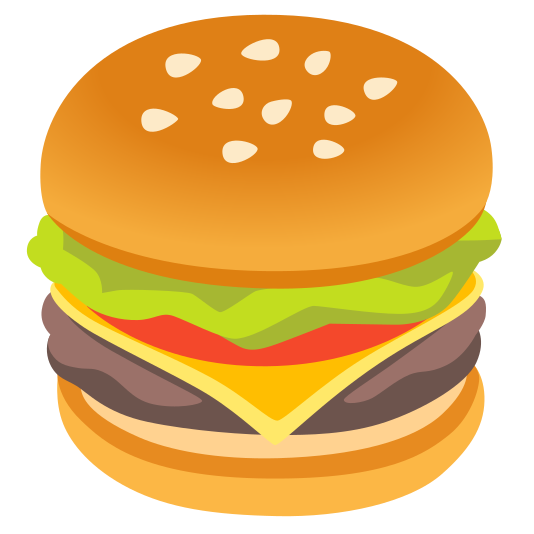

ValueError: Could not save to JPEG for display

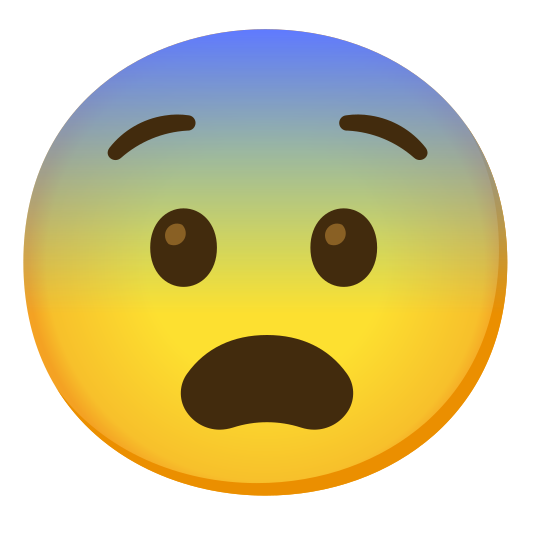

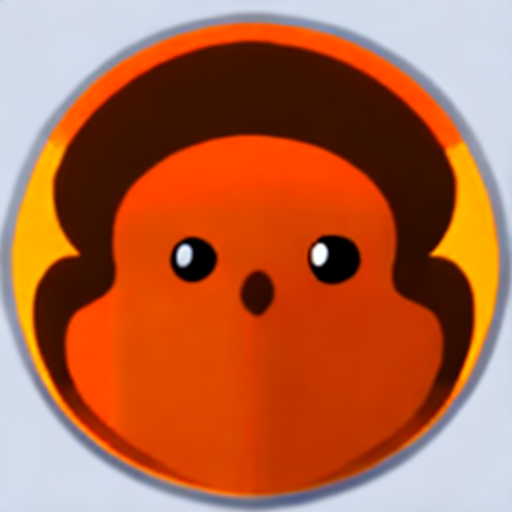

In [77]:
img1.show()
img2.show()
Ans['images'][0].show()

In [71]:
modelstr="runwayml/stable-diffusion-v1-5"
lorapipe= StableDiffusionPipeline.from_pretrained(
      modelstr
    ).to("cuda")
lorapipe.enable_attention_slicing()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [72]:
num_inference_steps=30
device='cuda'
model_path = "../weights/finetuned_emojis_2"
#lorapipe.unet.load_attn_procs(model_path)
#pipe.text_encoder.load_attn_procs(model_path)
lorapipe.scheduler.set_timesteps(num_inference_steps, device=device)
#timesteps = pipe.scheduler.timesteps

In [38]:
#tokens=pipe.tokenizer('beautiful sunset',return_tensors="pt")
#embeds=pipe.text_encoder(tokens['input_ids'].cuda(),attention_mask=tokens['attention_mask'].cuda())[0]
#negembeds=None


In [44]:
Ans=lorapipe('beautiful sunset emoji')

  0%|          | 0/50 [00:00<?, ?it/s]

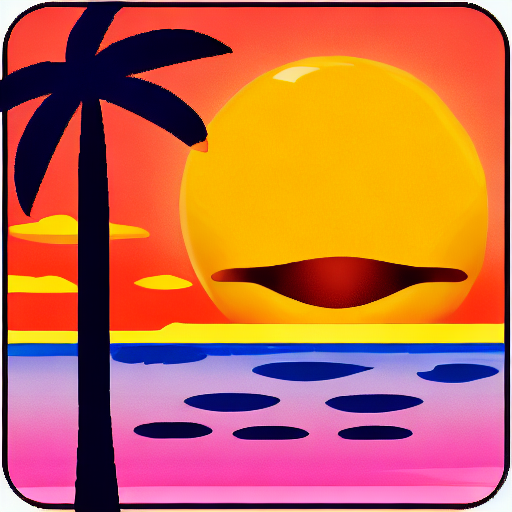

In [41]:
Ans['images'][0]

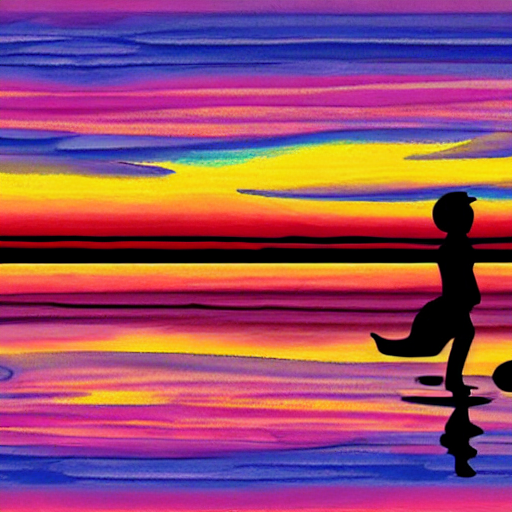

In [45]:
Ans['images'][0]

In [ ]:
with torch.no_grad():
    enc1=vae.encode(imgtorch1.half()/255).latent_dist
    enc2=vae.encode(imgtorch2.half()/255).latent_dist
    #enc=enc1+enc2
    sample=enc1.mode()/2+enc2.mode()/2
    dec=vae.decode(sample).sample
    imgdec=dec[0].permute(1,2,0).detach().cpu().numpy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


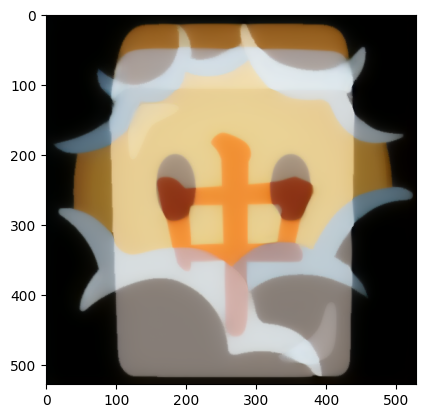

In [ ]:
plt.imshow(imgdec.astype(float))